In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

import tkinter as tk
from tkinter import filedialog as fd

In [2]:
# open file dialog
root = tk.Tk()
root.attributes('-topmost', True)
root.iconify()
file_name = fd.askopenfilename(parent=root, filetypes=[(".shp", ".shp")])
root.destroy()

In [3]:
file_name

'D:/OneDrive - Ingenio Azucarero Guabira S.A/UTEA_2023/CATASTRO/CATASTRO_2023-03-04.shp'

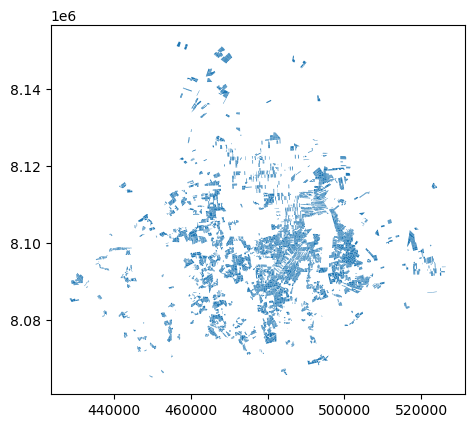

In [4]:
# leer el .shp seleccionado
data = gpd.read_file(file_name)
data.plot()
plt.show()

In [5]:
data.head(5)

,id,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,variedad,fs,textura,financia,soca,cultivo,zona,area,geometry
0,00005600000L1.3,560.0,LA TUJA IAG SA,15284.0,ROJAS CORDOVA ROGELIO FELIPE,L1.3,UCG_90-20,30/5/2018,FY,IAG,4,canha,79,0.771315,"POLYGON Z ((491741.706 8084531.788 0.000, 4916..."
1,00005600000L1.5,560.0,LA TUJA IAG SA,15284.0,ROJAS CORDOVA ROGELIO FELIPE,L1.5,UCG_90-20,20/5/2011,FY,None,11,canha,79,3.831973,"POLYGON Z ((491971.566 8084838.542 0.000, 4920..."
2,00005600000L2.2,560.0,LA TUJA IAG SA,15284.0,ROJAS CORDOVA ROGELIO FELIPE,L2.2,CITTCA_85-22,20/5/2018,FY,IAG,4,canha,79,2.245713,"POLYGON Z ((492266.427 8084941.630 0.000, 4923..."
3,00005600000L3.1,560.0,LA TUJA IAG SA,15284.0,ROJAS CORDOVA ROGELIO FELIPE,L3.1,UCG_90-20,20/5/2018,FY,IAG,4,canha,79,5.299549,"POLYGON Z ((491766.316 8084838.970 0.000, 4916..."
4,00005600000L5,560.0,LA TUJA IAG SA,15284.0,ROJAS CORDOVA ROGELIO FELIPE,L5,RENOVACION,1/1/1900,F,None,122,renovacion,79,1.726920,"POLYGON Z ((491962.463 8085417.995 0.000, 4916..."


In [6]:
data.to_file('CATASTRO_2023-03-04.geojson', driver='GeoJSON')

In [7]:
# open file dialog
root = tk.Tk()
root.attributes('-topmost', True)
root.iconify()
file_name = fd.askopenfilename(parent=root, filetypes=[(".geojson", ".geojson")])
root.destroy()

In [8]:
file_name

'C:/Users/UTEA/Desktop/PYTHON/utea_scripts/generar_detalle_grupo_cosecha/CATASTRO_2023-03-04.geojson'

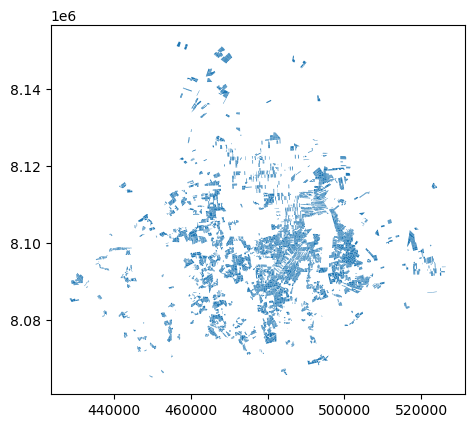

In [16]:
data = gpd.read_file(file_name)
data.plot()
plt.show()

In [18]:
data.head(5)

,id,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,variedad,fs,textura,financia,soca,cultivo,zona,area,geometry
0,00005600000L1.3,560.0,LA TUJA IAG SA,15284.0,ROJAS CORDOVA ROGELIO FELIPE,L1.3,UCG_90-20,30/5/2018,FY,IAG,4,canha,79,0.771315,"POLYGON Z ((491741.706 8084531.788 0.000, 4916..."
1,00005600000L1.5,560.0,LA TUJA IAG SA,15284.0,ROJAS CORDOVA ROGELIO FELIPE,L1.5,UCG_90-20,20/5/2011,FY,None,11,canha,79,3.831973,"POLYGON Z ((491971.566 8084838.542 0.000, 4920..."
2,00005600000L2.2,560.0,LA TUJA IAG SA,15284.0,ROJAS CORDOVA ROGELIO FELIPE,L2.2,CITTCA_85-22,20/5/2018,FY,IAG,4,canha,79,2.245713,"POLYGON Z ((492266.427 8084941.630 0.000, 4923..."
3,00005600000L3.1,560.0,LA TUJA IAG SA,15284.0,ROJAS CORDOVA ROGELIO FELIPE,L3.1,UCG_90-20,20/5/2018,FY,IAG,4,canha,79,5.299549,"POLYGON Z ((491766.316 8084838.970 0.000, 4916..."
4,00005600000L5,560.0,LA TUJA IAG SA,15284.0,ROJAS CORDOVA ROGELIO FELIPE,L5,RENOVACION,1/1/1900,F,None,122,renovacion,79,1.726920,"POLYGON Z ((491962.463 8085417.995 0.000, 4916..."


In [19]:
data.crs

<Projected CRS: EPSG:32720>
Name: WGS 84 / UTM zone 20S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 66°W and 60°W, southern hemisphere between 80°S and equator, onshore and offshore. Argentina. Bolivia. Brazil. Falkland Islands (Malvinas). Paraguay.
- bounds: (-66.0, -80.0, -60.0, 0.0)
Coordinate Operation:
- name: UTM zone 20S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [20]:
data_new = data.to_crs(epsg=3857)

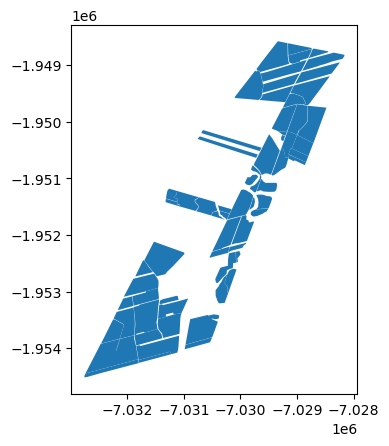

In [21]:
propiedad = data_new[data_new['unidad_01']==19]
propiedad.plot()
plt.show()

In [22]:
propiedad = data_new.dissolve(by='unidad_01')

TopologyException: Input geom 0 is invalid: Self-intersection at or near point -7012609.6925959233 -1951956.472363729 0 at -7012609.6925959233 -1951956.472363729 0
TopologyException: Input geom 0 is invalid: Self-intersection at or near point -7012609.6925959233 -1951956.472363729 0 at -7012609.6925959233 -1951956.472363729 0


ValueError: No Shapely geometry can be created from null value

In [19]:
gdf_disuelto

NameError: name 'gdf_disuelto' is not defined

In [56]:
#gdf_disuelto.crs = "EPSG:4326"
gdf_disuelto = gdf_disuelto.to_crs(epsg=3857)

In [57]:
gdf_disuelto['geometry'] = gdf_disuelto.geometry.buffer(100)

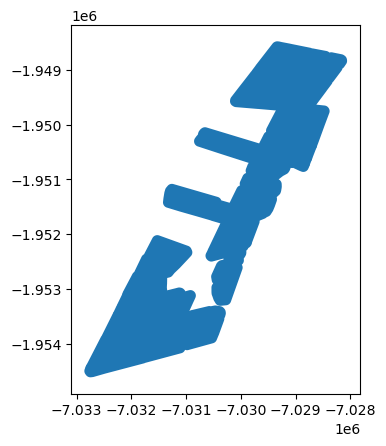

In [58]:
gdf_disuelto.plot()

In [59]:
gdf_disuelto

,geometry,NOM_LOTE,TEXTURA,SUPERFICIE,VARIEDAD,FECHA_SIEM,CORTE,ESTADO,RENDIMIENT,COD_PROP,ID,CUADRANTE
COD_CA,,,,,,,,,,,,
388,"MULTIPOLYGON (((-7029803.663 -1949019.363, -70...",L11.2,FY,15.566024,SP 83-5073,20190801,3,SOCA,60.460926,19.0,0000190000L11.2,359
18358,"MULTIPOLYGON (((-7029849.729 -1950801.020, -70...",L15,F,16.424708,CITTCA 85-22,20140420,8,SOCA,60.460926,19.0,0000190000L15,359
